In [111]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor

In [88]:
data = pd.read_csv('C:/Users/ASUS/Desktop/Project2/store_data.csv')
data

,Sales,Quantity,Discount,Profit,ShippingCost,Region,ShipMode,OrderDate,Market,OrderPriority,Category,SubCategory,Segment
0,13.08,3,0.0,4.56,1.03,North,Standard Class,2014-10-02,LATAM,Medium,Office Supplies,Labels,Consumer
1,252.16,8,0.0,90.72,13.45,South,Standard Class,2012-10-15,LATAM,Medium,Furniture,Furnishings,Consumer
2,193.28,2,0.0,54.08,9.63,South,Standard Class,2012-10-15,LATAM,Medium,Furniture,Bookcases,Consumer
3,35.44,4,0.0,4.96,1.37,South,Standard Class,2012-10-15,LATAM,Medium,Office Supplies,Binders,Consumer
4,71.60,2,0.0,11.44,3.79,South,Standard Class,2012-10-15,LATAM,Medium,Office Supplies,Art,Consumer
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49665,11.07,1,0.0,3.42,1.98,EMEA,First Class,2012-09-05,EMEA,High,Office Supplies,Binders,Consumer
49666,61.44,2,0.0,18.42,13.02,EMEA,First Class,2012-09-05,EMEA,High,Technology,Accessories,Consumer
49667,80.52,4,0.0,20.88,8.78,EMEA,First Class,2012-09-05,EMEA,High,Office Supplies,Art,Consumer
49668,130.44,4,0.0,33.84,18.97,EMEA,First Class,2012-09-05,EMEA,High,Office Supplies,Paper,Consumer


In [89]:
df = data.copy()

In [90]:
counts_df = df.ShipMode.value_counts().to_frame(name='Count')
counts_df = counts_df.reset_index().rename(columns={'index': 'Shipping method'})
counts_df.to_csv('counts_ShMethods.csv', index=False)
counts_df

,Shipping method,Count
0,Standard Class,29846
1,Second Class,9972
2,First Class,7232
3,Same Day,2620


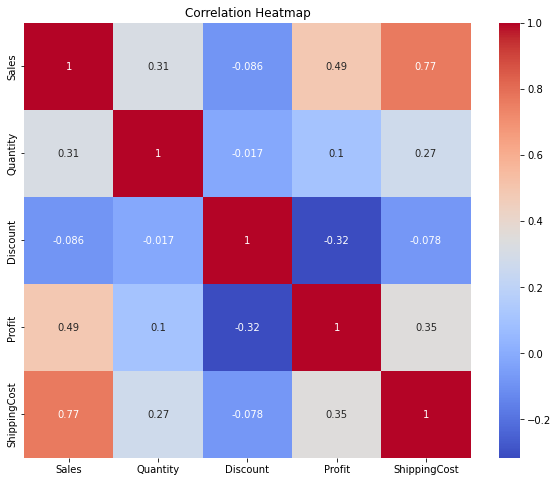

In [91]:
# Calculate the correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [92]:
df= df.drop('SubCategory', axis=1)
df = df.drop('Market', axis=1)
df = df.drop('Quantity', axis=1)
df = df.drop('ShippingCost', axis=1)
df = df.drop('OrderDate', axis=1)

In [93]:
df

,Sales,Discount,Profit,Region,ShipMode,OrderPriority,Category,Segment
0,13.08,0.0,4.56,North,Standard Class,Medium,Office Supplies,Consumer
1,252.16,0.0,90.72,South,Standard Class,Medium,Furniture,Consumer
2,193.28,0.0,54.08,South,Standard Class,Medium,Furniture,Consumer
3,35.44,0.0,4.96,South,Standard Class,Medium,Office Supplies,Consumer
4,71.60,0.0,11.44,South,Standard Class,Medium,Office Supplies,Consumer
...,...,...,...,...,...,...,...,...
49665,11.07,0.0,3.42,EMEA,First Class,High,Office Supplies,Consumer
49666,61.44,0.0,18.42,EMEA,First Class,High,Technology,Consumer
49667,80.52,0.0,20.88,EMEA,First Class,High,Office Supplies,Consumer
49668,130.44,0.0,33.84,EMEA,First Class,High,Office Supplies,Consumer


In [94]:
order_priority_mapping = {'Low': 0, 'Medium': 1, 'High': 2, 'Critical': 3}
df['OrderPriority'] = df['OrderPriority'].map(order_priority_mapping)
ship_mode_mapping = {'Same Day': 0, 'First Class': 1, 'Second Class': 2, 'Standard Class': 3}
df['ShipMode'] = df['ShipMode'].map(ship_mode_mapping)
df

,Sales,Discount,Profit,Region,ShipMode,OrderPriority,Category,Segment
0,13.08,0.0,4.56,North,3,1,Office Supplies,Consumer
1,252.16,0.0,90.72,South,3,1,Furniture,Consumer
2,193.28,0.0,54.08,South,3,1,Furniture,Consumer
3,35.44,0.0,4.96,South,3,1,Office Supplies,Consumer
4,71.60,0.0,11.44,South,3,1,Office Supplies,Consumer
...,...,...,...,...,...,...,...,...
49665,11.07,0.0,3.42,EMEA,1,2,Office Supplies,Consumer
49666,61.44,0.0,18.42,EMEA,1,2,Technology,Consumer
49667,80.52,0.0,20.88,EMEA,1,2,Office Supplies,Consumer
49668,130.44,0.0,33.84,EMEA,1,2,Office Supplies,Consumer


In [95]:
df.isnull().sum()

Sales            0
Discount         0
Profit           0
Region           0
ShipMode         0
OrderPriority    0
Category         0
Segment          0
dtype: int64

In [96]:
for column in ['Segment', 'Region', 'Category']:
    dummies = pd.get_dummies(df[column], prefix=column)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)

In [97]:
df

,Sales,Discount,Profit,ShipMode,OrderPriority,Segment_Consumer,Segment_Corporate,Segment_Home Office,Region_Africa,Region_Canada,...,Region_East,Region_North,Region_North Asia,Region_Oceania,Region_South,Region_Southeast Asia,Region_West,Category_Furniture,Category_Office Supplies,Category_Technology
0,13.08,0.0,4.56,3,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,252.16,0.0,90.72,3,1,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,193.28,0.0,54.08,3,1,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,35.44,0.0,4.96,3,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,71.60,0.0,11.44,3,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49665,11.07,0.0,3.42,1,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
49666,61.44,0.0,18.42,1,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
49667,80.52,0.0,20.88,1,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
49668,130.44,0.0,33.84,1,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


Text(0.5, 1.0, 'Discount')

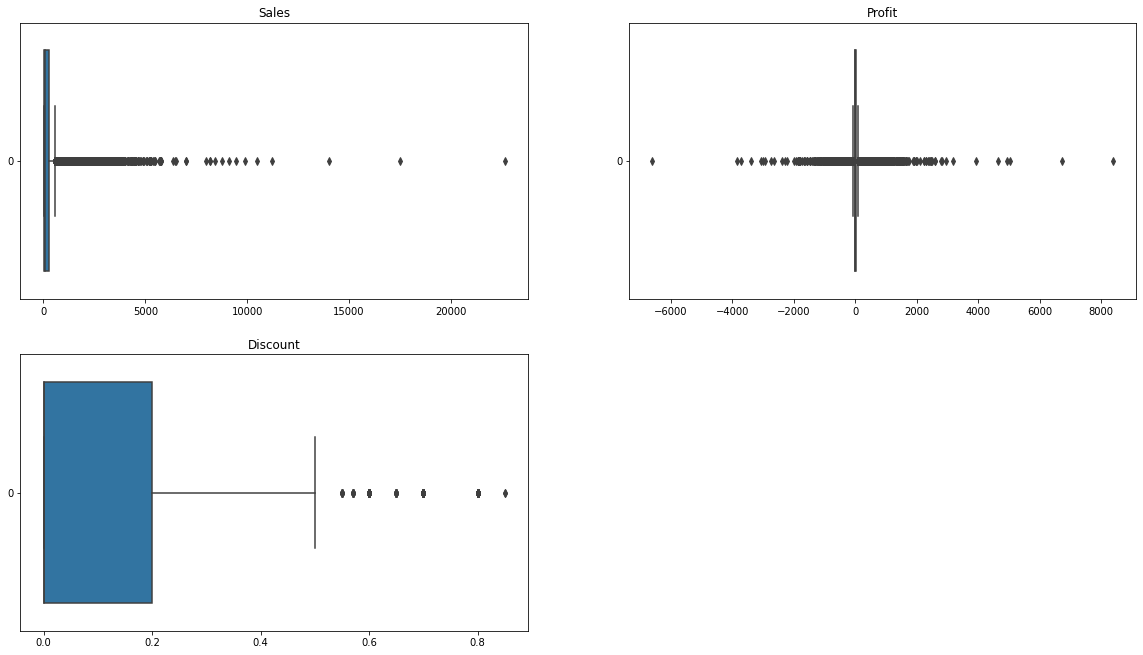

In [98]:
plt.figure(figsize=(20,60))
plt.subplot(10,2,1)
sns.boxplot(df['Sales'],orient="horizontal")
plt.title('Sales')
plt.subplot(10,2,2)
sns.boxplot(df['Profit'],orient="horizontal")
plt.title('Profit')
plt.subplot(10,2,3)
sns.boxplot(df['Discount'],orient="horizontal")
plt.title('Discount')

<AxesSubplot: xlabel='Discount', ylabel='Density'>

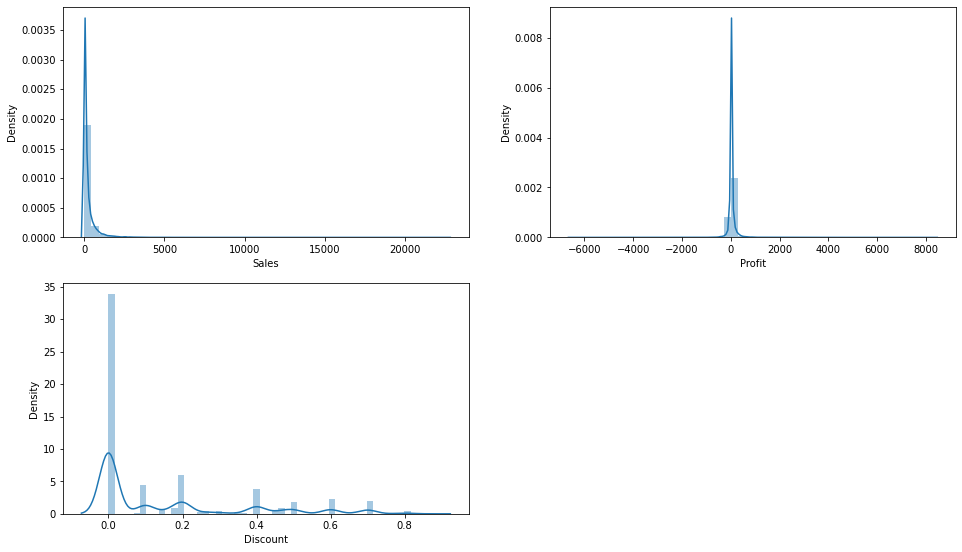

In [99]:
import warnings
warnings.filterwarnings('ignore')


plt.figure(figsize=(16,50))
plt.subplot(10,2,1)
sns.distplot(df['Sales'])
plt.subplot(10,2,2)
sns.distplot(df['Profit'])
plt.subplot(10,2,3)
sns.distplot(df['Discount'])

In [100]:
# Removing outliers for 'total_sale'
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Sales'] >= Q1 - 1.5 * IQR) & (df['Sales'] <= Q3 + 1.5 * IQR)]
# Removing outliers for 'Profit'
Q1 = df['Profit'].quantile(0.25)
Q3 = df['Profit'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Profit'] >= Q1 - 1.5 * IQR) & (df['Profit'] <= Q3 + 1.5 * IQR)]
# # Removing outliers for 'Discount'
# Q1 = df['Discount'].quantile(0.25)
# Q3 = df['Discount'].quantile(0.75)
# IQR = Q3 - Q1
# df = df[(df['Discount'] >= Q1 - 1.5 * IQR) & (df['Discount'] <= Q3 + 1.5 * IQR)]
df['Discount_zscore'] = stats.zscore(df['Discount'])
threshold = 3
df = df[abs(df['Discount_zscore']) <= threshold]
df = df.drop('Discount_zscore', axis=1)

Text(0.5, 1.0, 'Discount')

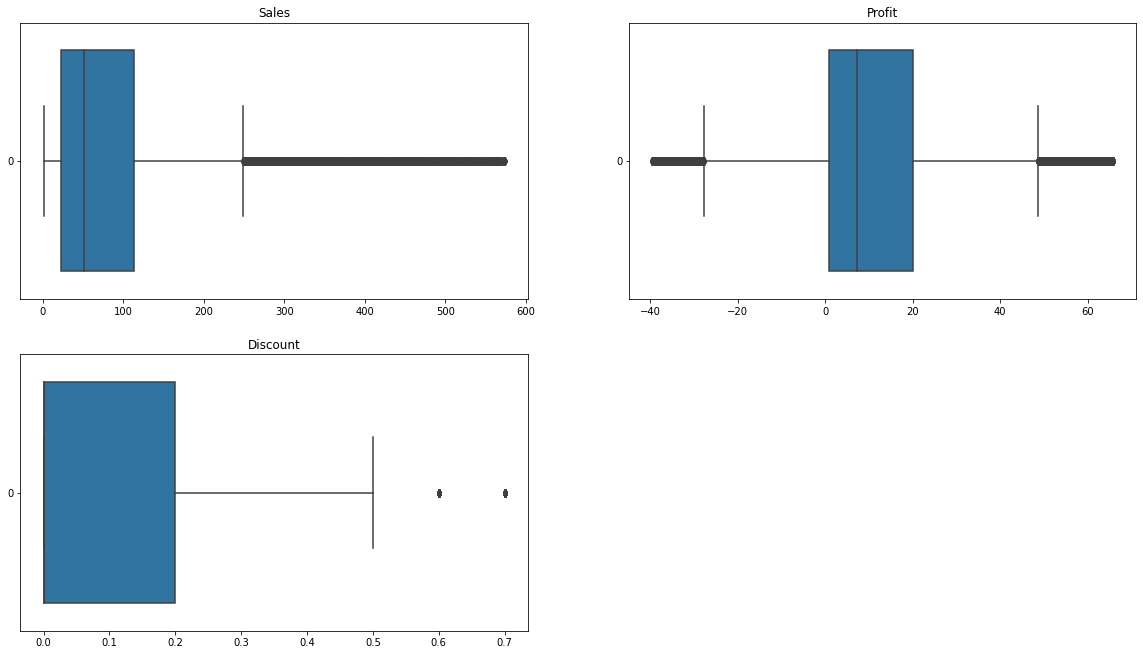

In [101]:
plt.figure(figsize=(20,60))
plt.subplot(10,2,1)
sns.boxplot(df['Sales'],orient="horizontal")
plt.title('Sales')
plt.subplot(10,2,2)
sns.boxplot(df['Profit'],orient="horizontal")
plt.title('Profit')
plt.subplot(10,2,3)
sns.boxplot(df['Discount'],orient="horizontal")
plt.title('Discount')

<AxesSubplot: xlabel='Discount', ylabel='Density'>

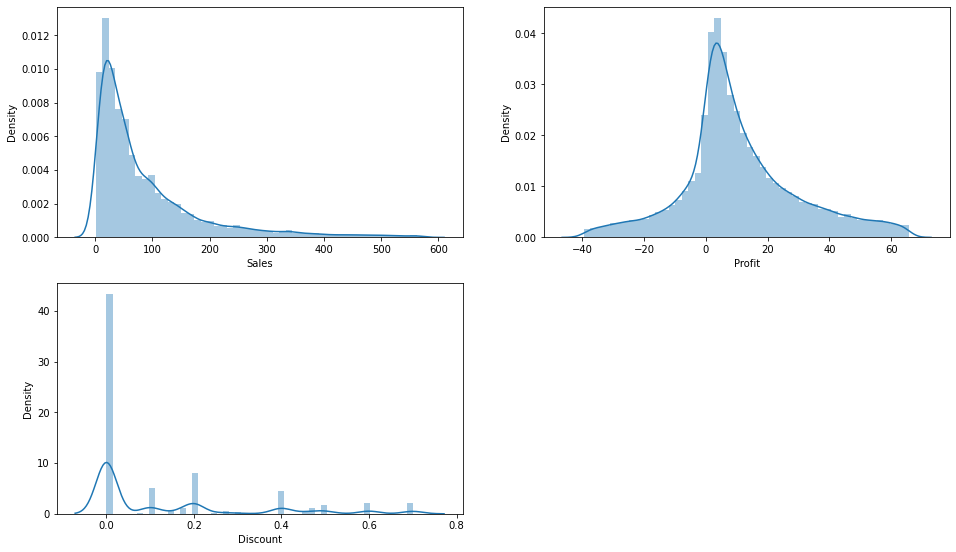

In [102]:
import warnings
warnings.filterwarnings('ignore')


plt.figure(figsize=(16,50))
plt.subplot(10,2,1)
sns.distplot(df['Sales'])
plt.subplot(10,2,2)
sns.distplot(df['Profit'])
plt.subplot(10,2,3)
sns.distplot(df['Discount'])

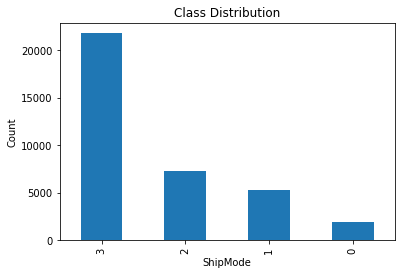

In [103]:
import matplotlib.pyplot as plt

class_counts.plot(kind='bar')
plt.xlabel('ShipMode')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()


# UnderSampling

In [104]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

y = df['ShipMode']
X = df.drop('ShipMode', axis=1)

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, train_size=0.8,shuffle=True, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f" % accuracy)

confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)
under_sampling = pd.DataFrame(confusion_mat, index=['Standard Class','Second Class','First Class','Same Day'], columns=['Standard Class','Second Class','First Class','Same Day'])
under_sampling = under_sampling.reset_index().rename(columns={'index': 'LABEL'})
under_sampling.to_csv('under_sampling.csv', index=False)

Accuracy: 0.34
Confusion Matrix:
[[141 111  87  82]
 [112 111  76  64]
 [ 96  84 103 109]
 [ 48  68  85 163]]
Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.33      0.34       421
           1       0.30      0.31      0.30       363
           2       0.29      0.26      0.28       392
           3       0.39      0.45      0.42       364

    accuracy                           0.34      1540
   macro avg       0.33      0.34      0.34      1540
weighted avg       0.33      0.34      0.33      1540



# oversampling

In [106]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

y = df['ShipMode']
X = df.drop('ShipMode', axis=1)

# Apply oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, train_size=0.8,shuffle=True, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy: %.2f" % accuracy)

confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)
over_sampling = pd.DataFrame(confusion_mat, index=['Standard Class','Second Class','First Class','Same Day'], columns=['Standard Class','Second Class','First Class','Same Day'])
over_sampling = over_sampling.reset_index().rename(columns={'index': 'LABEL'})
over_sampling.to_csv('over_sampling.csv', index=False)


Accuracy: 0.89
Confusion Matrix:
[[4394    0    0    4]
 [  25 4246   55   43]
 [  37  104 3949  208]
 [ 174  500  770 2925]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      4398
           1       0.88      0.97      0.92      4369
           2       0.83      0.92      0.87      4298
           3       0.92      0.67      0.77      4369

    accuracy                           0.89     17434
   macro avg       0.89      0.89      0.89     17434
weighted avg       0.89      0.89      0.89     17434



In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

y = df['ShipMode']
X = df.drop('ShipMode', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

model = LGBMClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f" % accuracy)

confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)


Accuracy: 0.51
Confusion Matrix:
[[ 179  202   54  141]
 [ 438  454  174  477]
 [ 484  519  269  998]
 [ 581  629  591 4703]]
Classification Report:
              precision    recall  f1-score   support

           1       0.11      0.31      0.16       576
           2       0.25      0.29      0.27      1543
           3       0.25      0.12      0.16      2270
           4       0.74      0.72      0.73      6504

    accuracy                           0.51     10893
   macro avg       0.34      0.36      0.33     10893
weighted avg       0.54      0.51      0.52     10893



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

y = df['ShipMode']
X = df.drop('ShipMode', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f" % accuracy)


confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)


Accuracy: 0.57
Confusion Matrix:
[[  51  120  132  273]
 [  72  335  285  851]
 [  80  339  434 1417]
 [  78  346  676 5404]]
Classification Report:
              precision    recall  f1-score   support

           1       0.18      0.09      0.12       576
           2       0.29      0.22      0.25      1543
           3       0.28      0.19      0.23      2270
           4       0.68      0.83      0.75      6504

    accuracy                           0.57     10893
   macro avg       0.36      0.33      0.34     10893
weighted avg       0.52      0.57      0.54     10893



In [107]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

y = df['ShipMode']
X = df.drop('ShipMode', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,shuffle=True, random_state=42)

model = SVC(gamma='scale')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f" % accuracy)

confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)
svm_without_sampling = pd.DataFrame(confusion_mat, index=['Standard Class','Second Class','First Class','Same Day'], columns=['Standard Class','Second Class','First Class','Same Day'])
svm_without_sampling = svm_without_sampling.reset_index().rename(columns={'index': 'LABEL'})
svm_without_sampling.to_csv('svm_without_sampling.csv', index=False)

Accuracy: 0.60
Confusion Matrix:
[[   0    0    0  370]
 [   0    0    0 1021]
 [   0    0    0 1528]
 [   0    0    0 4343]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       370
           1       0.00      0.00      0.00      1021
           2       0.00      0.00      0.00      1528
           3       0.60      1.00      0.75      4343

    accuracy                           0.60      7262
   macro avg       0.15      0.25      0.19      7262
weighted avg       0.36      0.60      0.45      7262



In [ ]:
!pip install lazypredict

In [ ]:
import lazypredict

In [ ]:
from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [05:22<00:00, 11.10s/it]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
NearestCentroid                    0.53               0.39    None      0.51   
GaussianNB                         0.58               0.34    None      0.56   
BernoulliNB                        0.59               0.34    None      0.55   
RandomForestClassifier             0.57               0.33    None      0.53   
KNeighborsClassifier               0.56               0.33    None      0.53   
ExtraTreesClassifier               0.54               0.33    None      0.52   
PassiveAggressiveClassifier        0.55               0.32    None      0.53   
SGDClassifier                      0.59               0.32    None      0.54   
BaggingClassifier                  0.56               0.32    None      0.53   
Perceptron                         0.49               0.32    None      0.50   
ExtraTreeClassifier                0.49 

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

y = df['ShipMode']
X = df.drop('ShipMode', axis=1)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, train_size=0.8,shuffle=True, random_state=32)

model = LGBMClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f" % accuracy)


Accuracy: 0.63


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

y = df['ShipMode']
X = df.drop('ShipMode', axis=1)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, train_size=0.8,shuffle=True, random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

model = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Best hyperparameters:", grid_search.best_params_)
print("Accuracy: %.2f" % accuracy)


Best hyperparameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.63


In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, train_test_split

y = df['ShipMode']
X = df.drop('ShipMode', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,shuffle=True, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'num_leaves': [31, 50, 100],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300]
}

# Create the LGBMClassifier model
model = LGBMClassifier(class_weight='balanced', random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get the best model and predict on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f" % accuracy)

confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

# Print the best hyperparameters found by GridSearchCV
print("Best Hyperparameters:", grid_search.best_params_)


Accuracy: 0.53
Confusion Matrix:
[[ 272  150   13  141]
 [ 614  394   44  491]
 [ 723  402   57 1088]
 [ 845  522   97 5040]]
Classification Report:
              precision    recall  f1-score   support

           1       0.11      0.47      0.18       576
           2       0.27      0.26      0.26      1543
           3       0.27      0.03      0.05      2270
           4       0.75      0.77      0.76      6504

    accuracy                           0.53     10893
   macro avg       0.35      0.38      0.31     10893
weighted avg       0.55      0.53      0.51     10893

Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300, 'num_leaves': 50}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, train_test_split
from imblearn.over_sampling import RandomOverSampler

y = df['ShipMode']
X = df.drop('ShipMode', axis=1)

# Apply oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, train_size=0.8,shuffle=True, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Create the RandomForestClassifier model
model = RandomForestClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get the best model and predict on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f" % accuracy)

confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

# Print the best hyperparameters found by GridSearchCV
print("Best Hyperparameters:", grid_search.best_params_)


Accuracy: 0.87
Confusion Matrix:
[[6631    0    5    5]
 [  62 6206  114  145]
 [  66  208 5737  422]
 [ 260  783 1265 4242]]
Classification Report:
              precision    recall  f1-score   support

           1       0.94      1.00      0.97      6641
           2       0.86      0.95      0.90      6527
           3       0.81      0.89      0.85      6433
           4       0.88      0.65      0.75      6550

    accuracy                           0.87     26151
   macro avg       0.87      0.87      0.87     26151
weighted avg       0.87      0.87      0.87     26151

Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


In [111]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

y = df['ShipMode']
X = df.drop('ShipMode', axis=1)

# Perform feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.8, shuffle=True, random_state=42)

# Create the XGBoost classifier model
model = xgb.XGBClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f" % accuracy)

confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)


Accuracy: 0.62
Confusion Matrix:
[[   2  123   46  405]
 [  19  264  143 1117]
 [  18  261  177 1814]
 [   7   63  117 6317]]
Classification Report:
              precision    recall  f1-score   support

           0       0.04      0.00      0.01       576
           1       0.37      0.17      0.23      1543
           2       0.37      0.08      0.13      2270
           3       0.65      0.97      0.78      6504

    accuracy                           0.62     10893
   macro avg       0.36      0.31      0.29     10893
weighted avg       0.52      0.62      0.53     10893



In [112]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

y = df['ShipMode']
X = df.drop('ShipMode', axis=1)

# Perform feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.8,shuffle= True, random_state=42)

# Create the XGBoost classifier model
model = xgb.XGBClassifier(random_state=42)

# Define the hyperparameters grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best Parameters:", best_params)

# Predict on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f" % accuracy)

confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)


Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Accuracy: 0.63
Confusion Matrix:
[[   0  145    0  431]
 [   0  339    0 1204]
 [   0  334    0 1936]
 [   0    0    0 6504]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       576
           1       0.41      0.22      0.29      1543
           2       0.00      0.00      0.00      2270
           3       0.65      1.00      0.78      6504

    accuracy                           0.63     10893
   macro avg       0.26      0.30      0.27     10893
weighted avg       0.44      0.63      0.51     10893



In [110]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

y = df['ShipMode']
X = df.drop('ShipMode', axis=1)

# Perform feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.8,shuffle= True, random_state=42)

# Create the XGBoost classifier model
model = xgb.XGBClassifier(learning_rate=0.1, n_estimators = 100, max_depth = 3, random_state=42)
model.fit(X_train, y_train)
# Predict on the test set using the best model
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f" % accuracy)

confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)
xgb_without_sampling = pd.DataFrame(confusion_mat, index=['Standard Class','Second Class','First Class','Same Day'], columns=['Standard Class','Second Class','First Class','Same Day'])
xgb_without_sampling  = xgb_without_sampling.reset_index().rename(columns={'index': 'LABEL'})
xgb_without_sampling .to_csv('xgb_without_sampling .csv', index=False)

Accuracy: 0.63
Confusion Matrix:
[[   0   85    1  284]
 [   0  210    8  803]
 [   0  215   11 1302]
 [   0    0    1 4342]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       370
           1       0.41      0.21      0.27      1021
           2       0.52      0.01      0.01      1528
           3       0.65      1.00      0.78      4343

    accuracy                           0.63      7262
   macro avg       0.40      0.30      0.27      7262
weighted avg       0.55      0.63      0.51      7262



In [131]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

y = df['ShipMode']
X = df.drop('ShipMode', axis=1)



# Perform feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.8,shuffle= True, random_state=42)


class_weight = {0: 8, 1: 3.5 , 2:3 , 3:1}

# Create a logistic regression classifier with cost-sensitive learning
clf = LogisticRegression(class_weight=class_weight)

# Fit the classifier to the data
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f" % accuracy)

confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)
logisticR_with_weighted = pd.DataFrame(confusion_mat, index=['Standard Class','Second Class','First Class','Same Day'], columns=['Standard Class','Second Class','First Class','Same Day'])
logisticR_with_weighted  = logisticR_with_weighted.reset_index().rename(columns={'index': 'LABEL'})
logisticR_with_weighted .to_csv('logisticR_with_weighted .csv', index=False)

Accuracy: 0.57
Confusion Matrix:
[[  45   94  136   95]
 [ 102  244  341  334]
 [ 109  257  434  728]
 [   1  261  673 3408]]
Classification Report:
              precision    recall  f1-score   support

           0       0.18      0.12      0.14       370
           1       0.29      0.24      0.26      1021
           2       0.27      0.28      0.28      1528
           3       0.75      0.78      0.77      4343

    accuracy                           0.57      7262
   macro avg       0.37      0.36      0.36      7262
weighted avg       0.55      0.57      0.56      7262



In [132]:
y = df['ShipMode']
X = df.drop('ShipMode', axis=1)



# Perform feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.8,shuffle= True, random_state=42)


class_weight = {0: 8, 1: 3.5 , 2:3.5 , 3:.8}

# Create a logistic regression classifier with cost-sensitive learning
clf = RandomForestClassifier(class_weight=class_weight)

# Fit the classifier to the data
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f" % accuracy)

confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)
xgb_with_modeling = pd.DataFrame(confusion_mat, index=['Standard Class','Second Class','First Class','Same Day'], columns=['Standard Class','Second Class','First Class','Same Day'])
xgb_with_modeling  = xgb_with_modeling.reset_index().rename(columns={'index': 'LABEL'})
xgb_with_modeling .to_csv('xgb_with_modeling .csv', index=False)

Accuracy: 0.57
Confusion Matrix:
[[  30   74   83  183]
 [  55  223  175  568]
 [  47  237  300  944]
 [  61  239  480 3563]]
Classification Report:
              precision    recall  f1-score   support

           0       0.16      0.08      0.11       370
           1       0.29      0.22      0.25      1021
           2       0.29      0.20      0.23      1528
           3       0.68      0.82      0.74      4343

    accuracy                           0.57      7262
   macro avg       0.35      0.33      0.33      7262
weighted avg       0.51      0.57      0.53      7262

